In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file="indiaprice.csv"
df=pd.read_csv(file)
# print(df.head())
# print(df.info())
# print(df.describe())

print(df.columns)

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')


now first creating feture matrix


here the columns are  >=2 therefore a multivariate thing


In [4]:
import pandas as pd


x = df[['number of bedrooms', 'number of bathrooms', 'living area', 'number of floors']]
y = df[['Price']]

print(x)
print(y)

       number of bedrooms  number of bathrooms  living area  number of floors
0                       5                 2.50         3650               2.0
1                       4                 2.50         2920               1.5
2                       5                 2.75         2910               1.5
3                       4                 2.50         3310               2.0
4                       3                 2.00         2710               1.5
...                   ...                  ...          ...               ...
14615                   2                 1.50         1556               1.0
14616                   3                 2.00         1680               1.5
14617                   2                 1.00         1070               1.0
14618                   4                 1.00         1030               1.0
14619                   3                 1.00          900               1.0

[14620 rows x 4 columns]
         Price
0      2380000
1      1

ValueError: x and y must be the same size

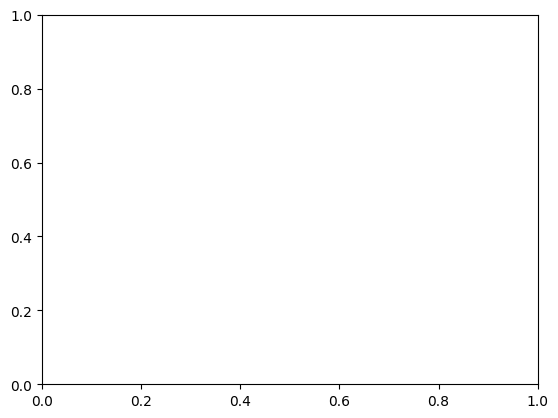

In [6]:
#scatter pllot
plt.scatter(x,y)

plt.show()

In [4]:
print("shape of x is ",x.shape)
print("shape of y is ",y.shape)

shape of x is  (14620, 4)
shape of y is  (14620, 1)


Now as we havefound the shape now what we will do is find the multivariate functions .

m=14620  (total number of samples )
n=4      (i.e there are 4 features)


f(x)=W^T . x +b 



below is the cost function :=---->

J(w,b)= summmation[(W^T * x + b - y)^2]/2m

update parameters will involve updating weights and bias 
d(J{w,b})/dw1...4 



In [6]:
weights = np.zeros(4)
print(weights)
bias = 0

learning_rate = 0.01
epochs = 10000

def calculate_cost(x, y, weights,bias):
    cost_history = []
    
    total_cost = 0
    for i in range(len(x)):
        y_pred = np.dot(weights, x[i]) + bias
        cost = (y_pred - y[i])**2
        cost_history.append(cost)
        
        total_cost += cost
    return total_cost/len(x),cost_history





[0. 0. 0. 0.]


Now updating parameters weights and biases
w_i=w_i - learning_rate(dJ/dw_i) 

In [8]:
def update_params(weights,bias,x,y,learning_rate):
    for i in range(len(x)):
        y_pred = np.dot(weights, x[i]) + bias
        weights = weights - learning_rate * (y_pred - y[i]) * x[i]
        bias = bias - learning_rate * (y_pred - y[i])

    return weights, bias

In [13]:
def gradient_descent(x, y, weights, bias, learning_rate, epochs):
    cost_history = []
    for i in range(epochs):
        cost,cost_history = calculate_cost(x, y, weights,bias)
        weights, bias = update_params(weights,bias,x,y,learning_rate)
        print("Cost after ",i," iteration is ",cost)
    return weights, bias,cost_history
print("weights before training ",weights)
print("bias before training ",bias)
weights, bias,cost_history = gradient_descent(x, y, weights, bias, learning_rate, epochs)




weights before training  [0. 0. 0. 0.]
bias before training  0


KeyError: 0

In [10]:
#now passing the values
weights, bias,cost_history = gradient_descent(x, y, weights, bias, learning_rate, epochs)
print("weights are ",weights)
print("bias is ",bias)
print("cost_history is ",cost_history)

KeyError: 0

In [7]:
import numpy as np
import pandas as pd

# Load the dataset
file = "indiaprice.csv"
df = pd.read_csv(file)

# Select features and target
x = df[['number of bedrooms', 'number of bathrooms', 'living area', 'number of floors']].values
y = df[['Price']].values

# Normalize the features
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

print("shape of x is", x.shape)
print("shape of y is", y.shape)

# Initialize weights and bias
weights = np.zeros(x.shape[1])
print("weights before training", weights)
bias = 0

learning_rate = 0.01

epochs = 1000

def calculate_cost(x, y, weights, bias):
    total_cost = 0
    cost_history = []
    for i in range(len(x)):
        y_pred = np.dot(weights, x[i]) + bias
        cost = (1/len(x)) * (y_pred - y[i, 0])**2
        cost_history.append(cost)
        total_cost += cost
    return total_cost / len(x), cost_history

def update_params(weights, bias, x, y, learning_rate):
    for i in range(len(x)):
        y_pred = np.dot(weights, x[i]) + bias
        weights = weights - learning_rate * (y_pred - y[i, 0]) * x[i]
        bias = bias - learning_rate * (y_pred - y[i, 0])
    return weights, bias

def gradient_descent(x, y, weights, bias, learning_rate, epochs):
    cost_history = []
    for i in range(epochs):
        cost, cost_history = calculate_cost(x, y, weights, bias)
        weights, bias = update_params(weights, bias, x, y, learning_rate)
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Cost after {i} iterations is {cost}")
            print(f"Weights: {weights}, Bias: {bias}")
    return weights, bias, cost_history

print("weights before training", weights)
print("bias before training", bias)
weights, bias, cost_history = gradient_descent(x, y, weights, bias, learning_rate, epochs)
print("weights after training", weights)
print("bias after training", bias)

shape of x is (14620, 4)
shape of y is (14620, 1)
weights before training [0. 0. 0. 0.]
bias before training 0
Cost after 0 iterations is 425518747493.0933
Weights: [-52080.63613065  36768.98937986 281802.66667996 -20136.30887807], Bias: 525493.6831428173
Cost after 100 iterations is 65461330133.463905
Weights: [-52080.63613065  36768.98937986 281802.66667996 -20136.30887807], Bias: 525493.6831428173
Cost after 200 iterations is 65461330133.463905
Weights: [-52080.63613065  36768.98937986 281802.66667996 -20136.30887807], Bias: 525493.6831428173
Cost after 300 iterations is 65461330133.463905
Weights: [-52080.63613065  36768.98937986 281802.66667996 -20136.30887807], Bias: 525493.6831428173
Cost after 400 iterations is 65461330133.463905
Weights: [-52080.63613065  36768.98937986 281802.66667996 -20136.30887807], Bias: 525493.6831428173
Cost after 500 iterations is 65461330133.463905
Weights: [-52080.63613065  36768.98937986 281802.66667996 -20136.30887807], Bias: 525493.6831428173
Cost

KeyboardInterrupt: 

Cost after 0 iterations is 425518747493.0933
Weights: [1133.65213651 1954.22986031 2617.36391527  965.59150816], Bias: 5389.322183310534
Cost after 100 iterations is 114553846195.26451
Weights: [ 20174.74551216  68239.92045828 129036.31025709  21884.78453754], Bias: 343638.26288439555
Cost after 200 iterations is 75393041747.6726
Weights: [ -1449.93483634  66250.20925146 174252.6963734   11233.4282682 ], Bias: 467448.31458240346
Cost after 300 iterations is 68349943598.75369
Weights: [-18702.88913462  58302.03710875 203038.47559432   3864.88539025], Bias: 512766.79767858505
Cost after 400 iterations is 66439428894.95927
Weights: [-3.03922742e+04  5.01944266e+04  2.23684727e+05 -1.20364056e+01], Bias: 529354.8281492316
Cost after 500 iterations is 65650474029.631615
Weights: [-38150.50868404  42770.02646289 238883.31862371  -1817.97443195], Bias: 535426.5837795136
Cost after 600 iterations is 65239312202.596115
Weights: [-43286.55248523  36243.06641085 250220.24955017  -2475.74841947], 

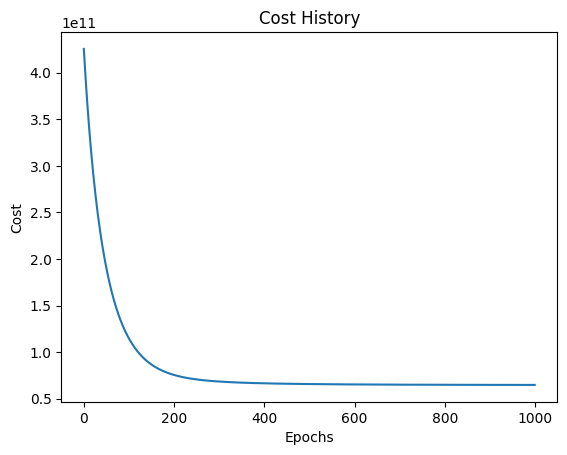

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file = "indiaprice.csv"
df = pd.read_csv(file)

# Select features and target
x = df[['number of bedrooms', 'number of bathrooms', 'living area', 'number of floors']].values
y = df[['Price']].values

# Normalize the features
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

# Initialize weights and bias
weights = np.zeros(x.shape[1])
bias = 0

learning_rate = 0.01
epochs = 1000

def calculate_cost(x, y, weights, bias):
    y_pred = np.dot(x, weights) + bias
    return np.mean((y_pred - y.flatten())**2)

def update_params(weights, bias, x, y, learning_rate):
    y_pred = np.dot(x, weights) + bias
    error = y_pred - y.flatten()
    weights -= learning_rate * (np.dot(x.T, error) / len(y))
    bias -= learning_rate * np.mean(error)
    return weights, bias

def gradient_descent(x, y, weights, bias, learning_rate, epochs):
    cost_history = []
    for i in range(epochs):
        cost = calculate_cost(x, y, weights, bias)
        cost_history.append(cost)
        weights, bias = update_params(weights, bias, x, y, learning_rate)
        if i % 100 == 0: 
            print(f"Cost after {i} iterations is {cost}")
            print(f"Weights: {weights}, Bias: {bias}")
    return weights, bias, cost_history

weights_before_training = weights.copy()
bias_before_training = bias

weights, bias, cost_history = gradient_descent(x, y, weights_before_training, bias_before_training,
                                              learning_rate, epochs)

print("weights after training", weights)
print("bias after training", bias)

# Plotting Cost History
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()
